<a href="https://colab.research.google.com/github/09-07-2003/ADVANCED-DL-EXPS/blob/main/EXP_2_Wrangling_and_Analysis_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import json
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# %matplotlib inline
plt.style.use('ggplot')
import urllib.request
url = 'https://raw.githubusercontent.com/MonashDataFluency/python-web-scraping/master/data/infoboxes.json'
urllib.request.urlretrieve(url, 'infoboxes.json')
with open('infoboxes.json', 'r') as file:
 wiki_data = json.load(file)
wiki_data[0]

{'founder': '[[Sam Walton]]',
 'location_country': 'U.S.',
 'revenue': '{{increase}} {{US$|514.405 billion|link|=|yes}} (2019)',
 'operating_income': '{{increase}} {{US$|21.957 billion}} (2019)',
 'net_income': '{{decrease}} {{US$|6.67 billion}} (2019)',
 'assets': '{{increase}} {{US$|219.295 billion}} (2019)',
 'equity': '{{decrease}} {{US$|79.634 billion}} (2019)',
 'type': '[[Public company|Public]]',
 'industry': '[[Retail]]',
 'products': '{{hlist|Electronics|Movies and music|Home and furniture|Home improvement|Clothing|Footwear|Jewelry|Toys|Health and beauty|Pet supplies|Sporting goods and fitness|Auto|Photo finishing|Craft supplies|Party supplies|Grocery}}',
 'num_employees': '{{plainlist|\n* 2.2|nbsp|million, Worldwide (2018)|ref| name="xbrlus_1" |\n* 1.5|nbsp|million, U.S. (2017)|ref| name="Walmart"|{{cite web |url = http://corporate.walmart.com/our-story/locations/united-states |title = Walmart Locations Around the World – United States |publisher = |url-status=live |archiveu

In [ ]:
for i in range(0,3):
 print(wiki_data[i]['products'])
 print('\n')

{{hlist|Electronics|Movies and music|Home and furniture|Home improvement|Clothing|Footwear|Jewelry|Toys|Health and beauty|Pet supplies|Sporting goods and fitness|Auto|Photo finishing|Craft supplies|Party supplies|Grocery}}


{{Unbulleted list
  | [[Crude oil]]
  | [[Oil products]]
  | [[Natural gas]]
  | [[Petrochemical]]s
  | [[Power generation]]}}


[[Investment|Diversified investments]], [[Insurance#Types|Property & casualty insurance]], [[Public utility|Utilities]], [[Restaurants]], [[Food processing]], [[Aerospace]], [[Toys]], [[Mass media|Media]], [[Automotive industry|Automotive]], [[Sports equipment|Sporting goods]], [[Final good|Consumer products]], [[Internet]], [[Real estate]]




In [ ]:
regex = re.compile(r'[\w\s-]+')

In [ ]:
import re
rogue_words = ['unbulleted list', 'hlist', 'flat list', 'flatlist', 'plainlist', 's', 'br', '']
products = []
data = []
for x in wiki_data:
 product = x['products'].lower()
 product = product.replace(' and ', '|').replace(']]', '')
 product = re.findall(r'\w+', product)
 product = [p.strip() for p in product] # get rid of leading or trailing whitespace
 product = list(set([p for p in product if p not in rogue_words]))
 # add to data
 data.append({
 'wiki_title' : x['company_name'],
 'product' : ', '.join(product) })
 products.extend(product)
print(products)


['grocery', 'photo', 'music', 'jewelry', 'clothing', 'improvement', 'health', 'craft', 'movies', 'electronics', 'beauty', 'furniture', 'toys', 'sporting', 'finishing', 'home', 'auto', 'supplies', 'pet', 'goods', 'footwear', 'fitness', 'party', 'crude', 'generation', 'oil', 'petrochemicals', 'natural', 'power', 'unbulleted', 'list', 'products', 'gas', 'diversified', 'investment', 'sports', 'internet', 'property', 'restaurants', 'casualty', 'media', 'good', 'investments', 'types', 'toys', 'food', 'automotive', 'public', 'insurance', 'aerospace', 'utility', 'consumer', 'sporting', 'equipment', 'final', 'real', 'products', 'utilities', 'mass', 'goods', 'processing', 'estate', 'industry', 'ipod', 'ipad', 'logic', 'siri', 'iphone', 'pro', 'macintosh', 'garageband', 'apple', 'iwork', 'ilife', 'ipados', 'final', 'shazam', 'homepod', 'macos', 'ios', 'cut', 'tv', 'watchos', 'watch', 'tvos', 'application', 'service', 'services', 'specialized', 'health', 'care', 'economics', 'ingenix', 'uniprise',

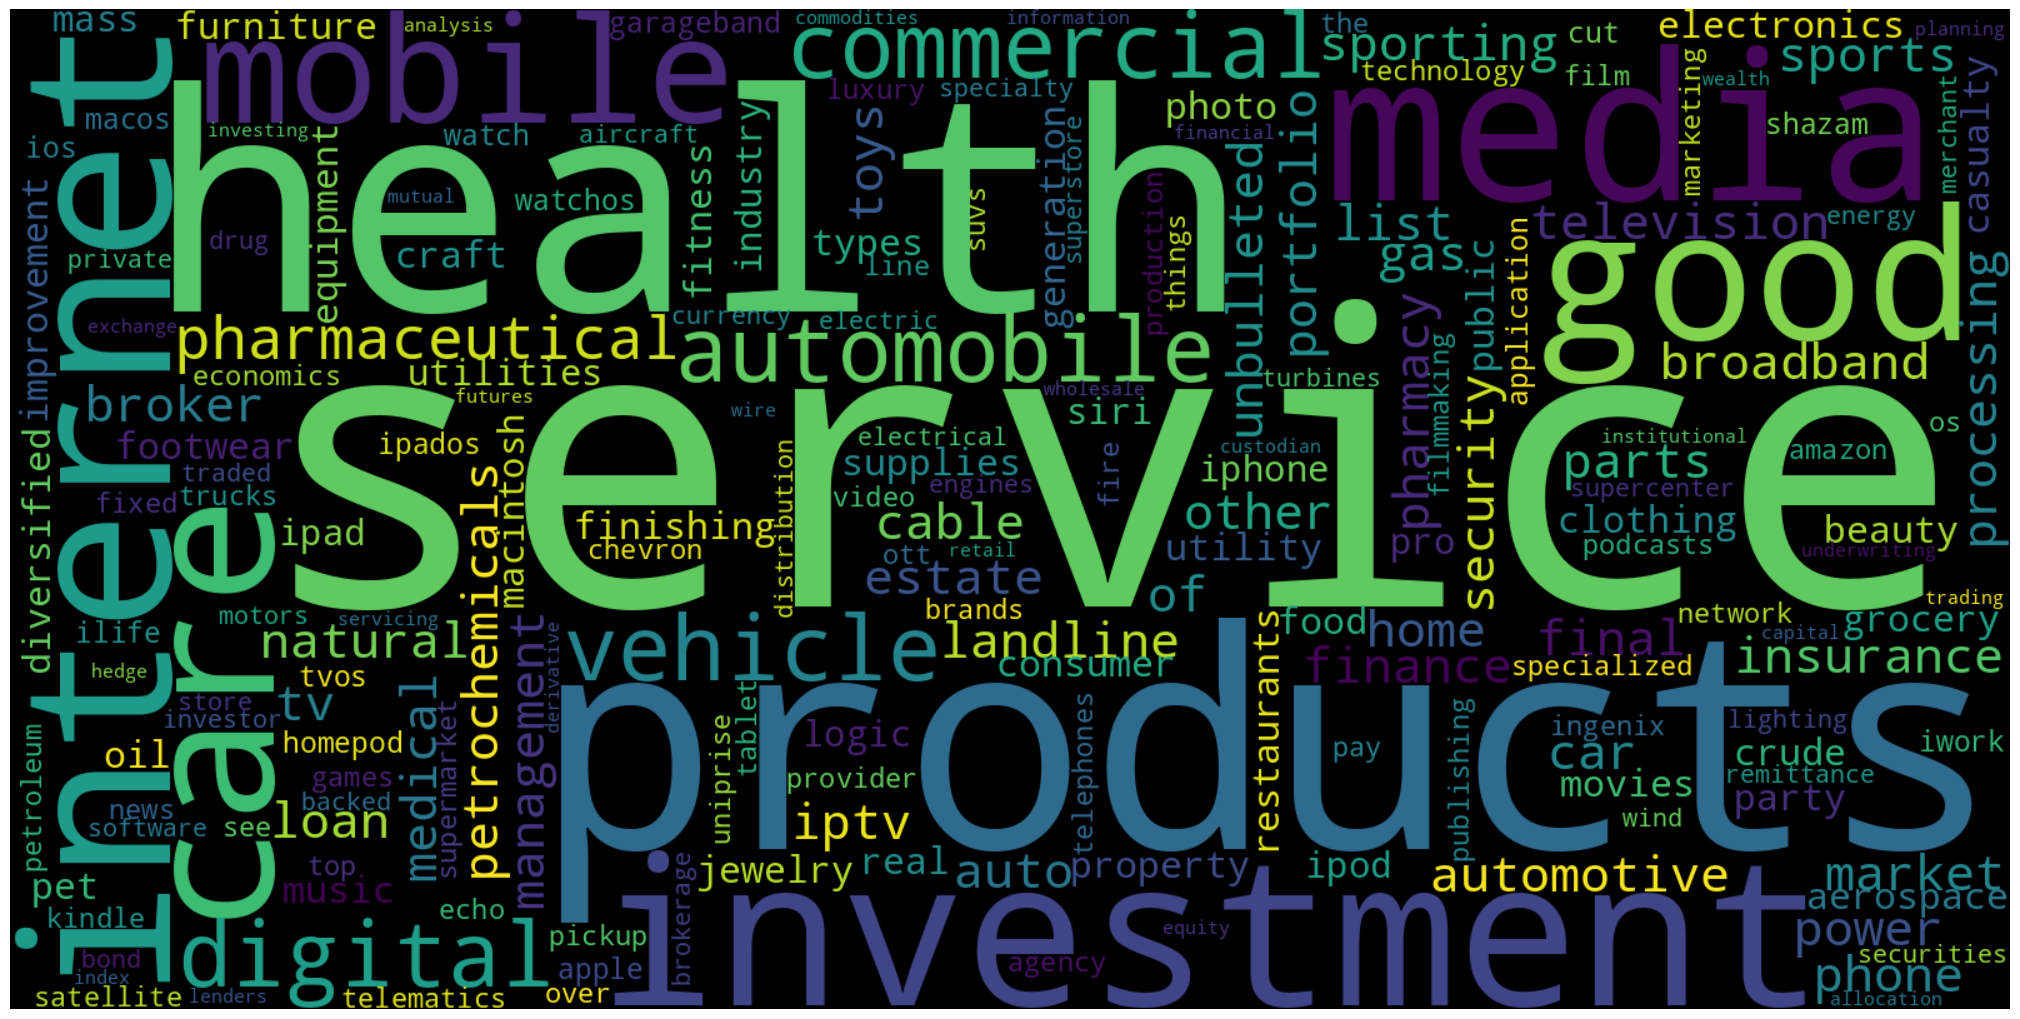

In [ ]:
def create_wordcloud(items, stopwords=[]):
    text = ' '.join(items)
    wordcloud = WordCloud(width=1600, height=800, margin=0, stopwords=stopwords).generate(text)
    plt.figure(figsize=(20, 10))  # set the final figure size
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout(pad=0)  # no padding
    plt.show()  # display plot

create_wordcloud(products)


[[Retail]]
[[Energy industry|Energy]]: [[Oil and gas industry|Oil and gas]]
[[Conglomerate (company)|Conglomerate]]
{{Unbulleted list | [[Computer hardware]] | [[Computer software]] | [[Consumer electronics]] | [[Cloud computing]] | [[Digital distribution]] | [[Fabless manufacturing|Fabless silicon design]] | [[Semiconductors]] | [[Financial technology]] | [[Artificial intelligence]]}}
[[Managed health care]]
['retail', 'industry', 'oil', 'energy', 'gas', 'conglomerate', 'company', 'computing', 'technology', 'unbulleted', 'list', 'fabless', 'design', 'intelligence', 'manufacturing', 'cloud', 'semiconductors', 'electronics', 'distribution', 'computer', 'consumer', 'artificial', 'software', 'silicon', 'financial', 'hardware', 'digital', 'health', 'care', 'managed', 'healthcare', 'care', 'health', 'retail', 'list', 'flat', 'grocery', 'e', 'consumer', 'cloud', 'artificial', 'computing', 'electronics', 'stores', 'intelligence', 'digital', 'distribution', 'commerce', 'mass', 'telecommunicati

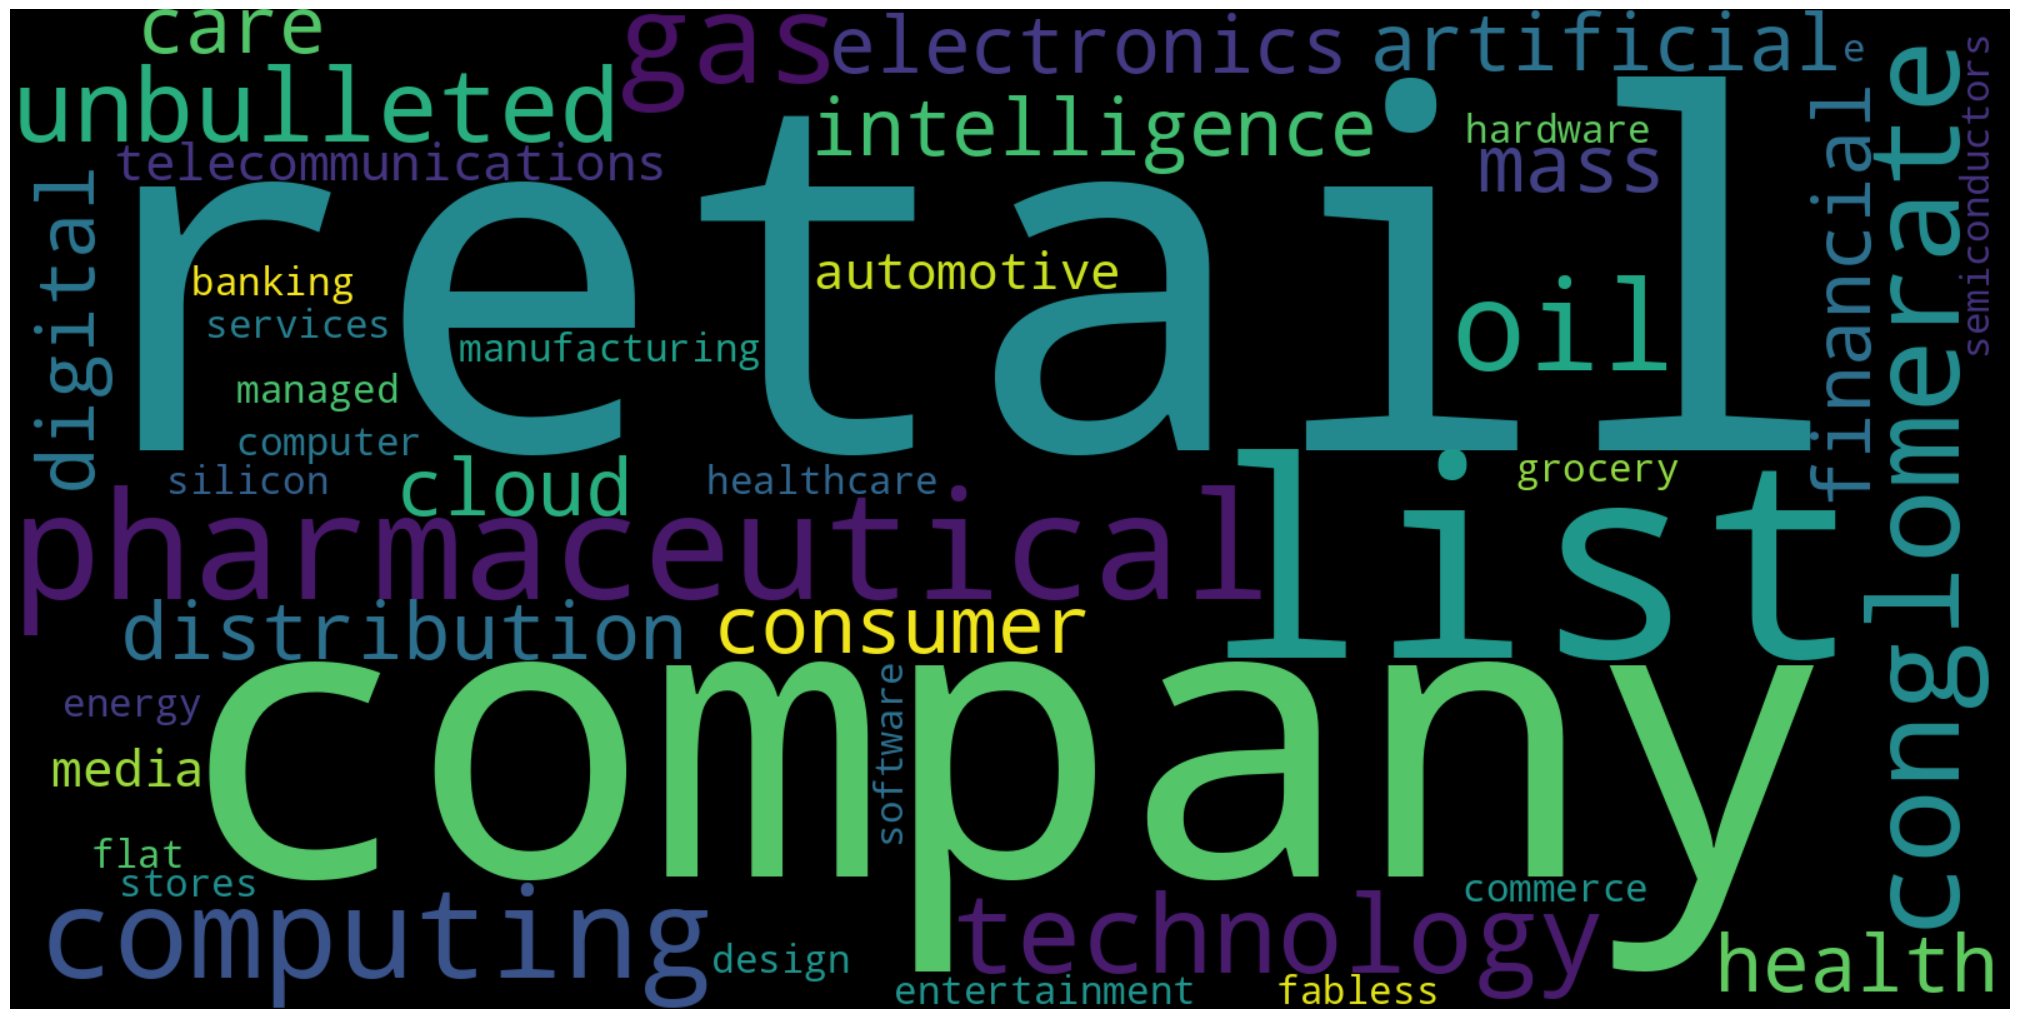

In [ ]:
import re
for i in range(0,5):
 print(wiki_data[i]['industry'])
 industries = []
for i, x in enumerate(wiki_data):
 industry = x['industry'].lower()
 industry = industry.replace(' and ', '|').replace(']]', '')
 industry = re.findall(r'\w+', industry)
 industry = [i.strip() for i in industry]
 industry = list(set([i for i in industry if i not in rogue_words]))
 data[i]['industry'] = ', '.join(industry)
 industries.extend(industry)

print(industries)
create_wordcloud(industries, ['industry'])

In [ ]:
for i in range(0,len(wiki_data)):
 print(wiki_data[i]['assets'])

{{increase}} {{US$|219.295 billion}} (2019)
{{Nowrap|Decrease| |US$|346.2 billion|ref| name="201310K"}} {{Decrease}} {{US$|346.2 billion}}
{{increase}} US$707.8 billion (2018)
{{Decrease}} {{US$|338.516&nbsp;billion}}
{{increase}} $173.889 billion (2019)
{{nowrap|increase| |US$|60.381 billion| |small|(2018)|ref| name=FY}} {{increase}} {{US$|60.381 billion}} {{small|(2018)}}
{{increase}} {{US$|196.456 billion}}
{{decrease}} {{US$|162.648 billion}}
{{increase}} {{US$|link|=|yes}} 531 billion     (2018)
{{increase}} US$227.339 billion {{small|(2018)}}
{{decrease}} {{US$|256.54 billion}} {{small|(2018)}}
{{increase}} {{US$|37.66 billion}} (2018)
{{decrease}} {{US$|253.9 billion}} {{small|(2018)}}
{{increase}} US$39.95 billion {{small|(2018)}}
{{increase}} US$45.40 billion
{{increase}} {{US$|264.82 billion}}
{{increase}} {{US$|38.11 billion}} (2019)
{{nowrap|Decrease| US$ 309.129 billion |small|(2018)}} {{Decrease}} US$ 309.129 billion {{small|(2018)}}
{{decrease}} {{US$|67.59 billion}}
{{i

In [ ]:
regex1 = re.compile('([\d\.]+)')
regex2 = re.compile('(billion|trillion)')
assets = []
for i, x in enumerate(wiki_data):
 y = x['assets']
 z = regex1.findall(y)[0]
 unit = regex2.findall(y)[0]
 asset = float(z)
 data[i]['assets'] = str(asset) + ' ' + unit
 assets.append({'company' : x['company_name'], 'value' : asset, 'unit' : unit})

for i, asset in enumerate(assets):
 if asset['unit'] == 'trillion':
   assets[i]['value'] = asset['value'] * 1000
   assets[i]['unit'] = 'billion'

df_assets = pd.DataFrame(assets)
df_assets


,company,value,unit
0,Walmart,219.295,billion
1,ExxonMobil,346.200,billion
2,Berkshire Hathaway,707.800,billion
3,Apple Inc.,338.516,billion
4,UnitedHealth Group,173.889,billion
5,McKesson Corporation,60.381,billion
6,CVS Health,196.456,billion
7,Amazon (company),162.648,billion
8,AT&T,531.000,billion
9,General Motors,227.339,billion


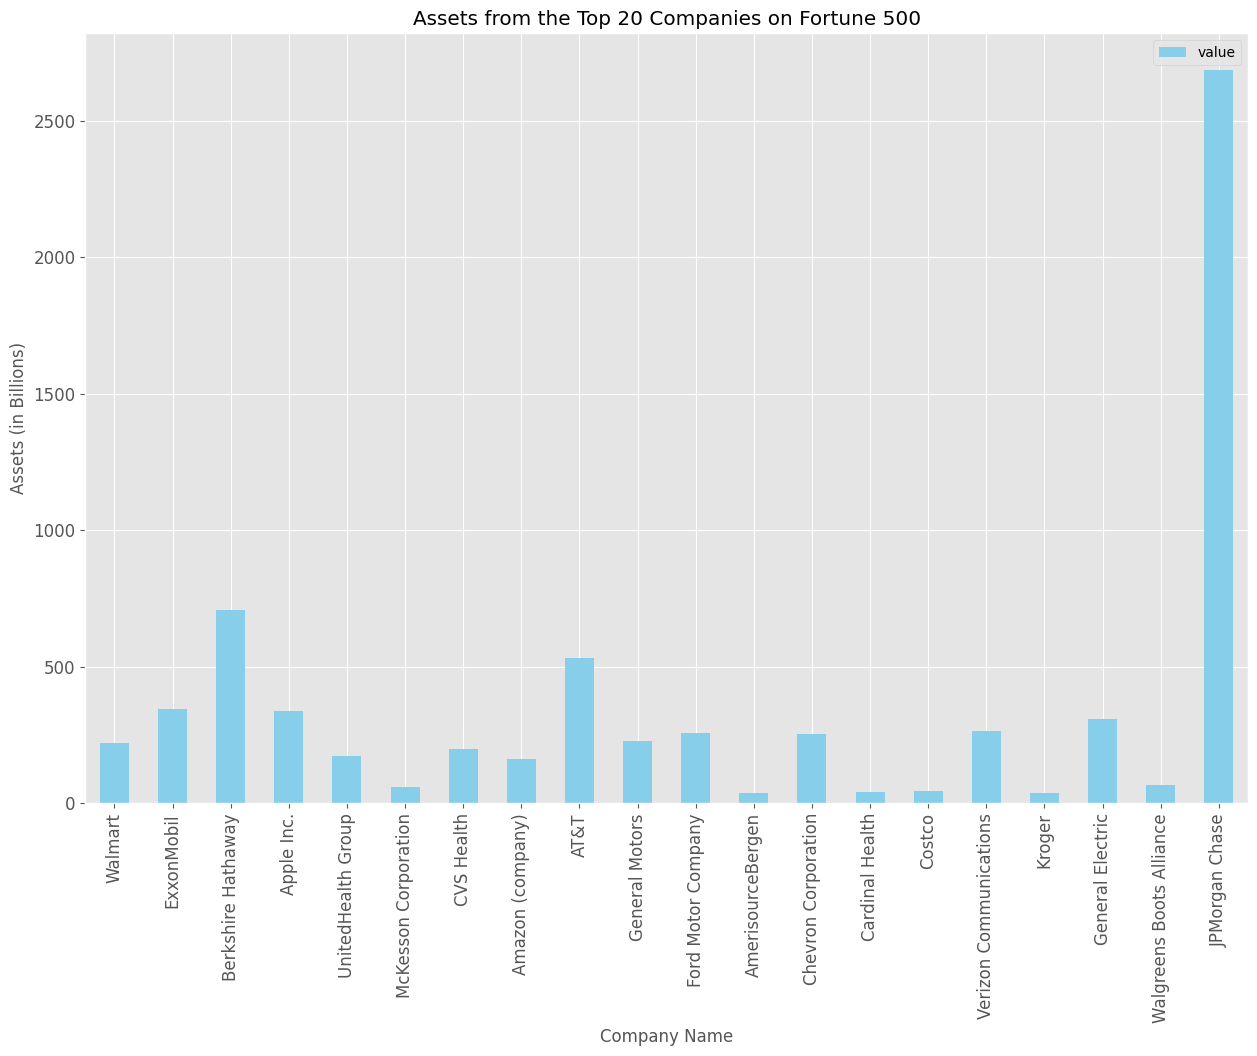

,wiki_title,product,industry,assets
0,Walmart,"grocery, photo, music, jewelry, clothing, impr...",retail,219.295 billion
1,ExxonMobil,"crude, generation, oil, petrochemicals, natura...","industry, oil, energy, gas",346.2 billion
2,Berkshire Hathaway,"diversified, investment, sports, internet, pro...","conglomerate, company",707.8 billion
3,Apple Inc.,"ipod, ipad, logic, siri, iphone, pro, macintos...","computing, technology, unbulleted, list, fable...",338.516 billion
4,UnitedHealth Group,"service, services, specialized, health, care, ...","health, care, managed",173.889 billion


In [ ]:
ax = df_assets.plot(kind='bar',
 title ="Assets from the Top 20 Companies on Fortune 500",
 color='skyblue',
 figsize=(15, 10),
 legend=True,
 fontsize=12
 )
ax.set_xticklabels(df_assets.company)
ax.set_xlabel("Company Name", fontsize=12)
ax.set_ylabel("Assets (in Billions)", fontsize=12)
plt.show()

df_wiki = pd.DataFrame(data)
df_wiki.head()

In [ ]:
#chandana-9921005114

In [ ]:
df = pd.read_csv('fortune_500_companies.csv', nrows=20)
df = pd.concat([df, df_wiki], axis=1)
print(df)



                                           name  rank  year  \
0                    General Motors Corporation     1  1996   
1                            Ford Motor Company     2  1996   
2                             Exxon Corporation     3  1996   
3                         Wal-Mart Stores, Inc.     4  1996   
4                                    AT&T Corp.     5  1996   
5   International Business Machines Corporation     6  1996   
6                      General Electric Company     7  1996   
7                             Mobil Corporation     8  1996   
8                          Chrysler Corporation     9  1996   
9                       Philip Morris Companies    10  1996   
10      Prudential Insurance Company of America    11  1996   
11                             State Farm Group    12  1996   
12    E.I. Du Pont de Nemours and Company, Inc.    13  1996   
13                                 Texaco, Inc.    14  1996   
14                     Sears, Roebuck & Company    15  

In [ ]:
df.to_csv('top_20_companies.csv', index=False)

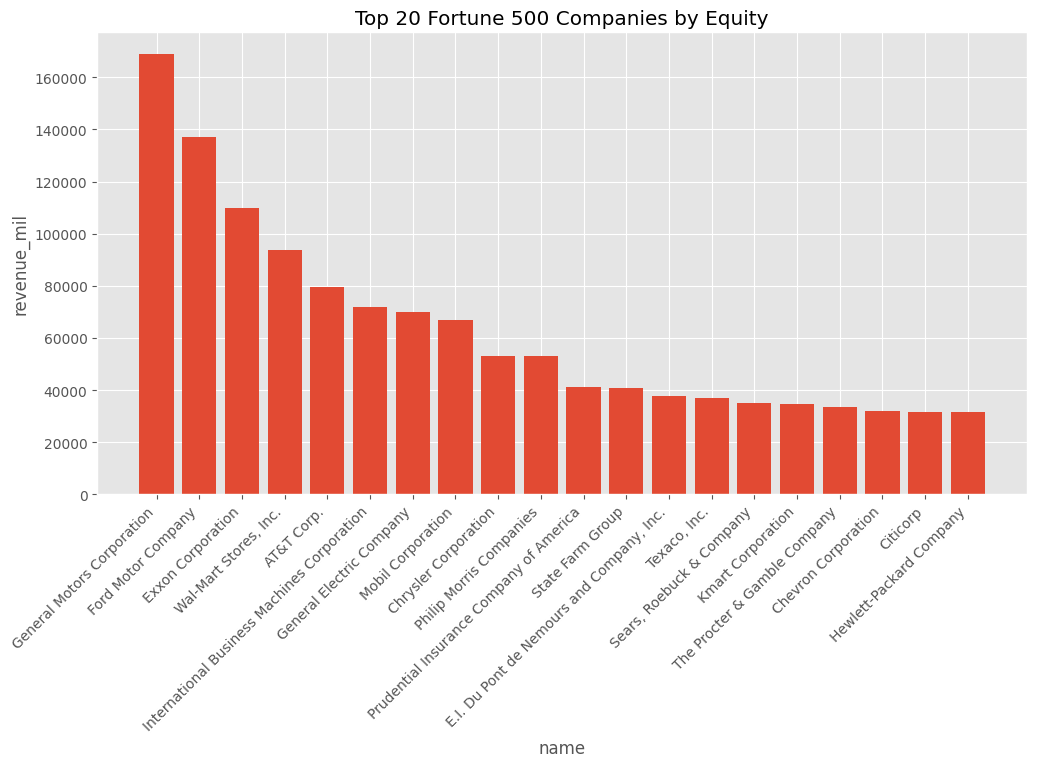

The company with the highest equity is: General Motors Corporation


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a bar chart of equity for the top 20 Fortune 500 companies
plt.figure(figsize=(12, 6))
df_top20 = df.head(20)  # Assuming df is sorted by equity, adjust if needed
plt.bar(df_top20['name'], df_top20['revenue_mil'])
plt.xlabel('name')
plt.ylabel('revenue_mil')
plt.title('Top 20 Fortune 500 Companies by Equity')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display the plot
plt.show()

# Find out which company has the highest equity
max_revenue_mil_name = df.loc[df['revenue_mil'].idxmax()]['name']
print(f"The company with the highest equity is: {max_revenue_mil_name}")



In [ ]:
#irfan-9921005067